In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


In [34]:
!pip install tensorflow==2.8


  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)


In [35]:
#1 DATA STUDY
#1º Import and create dataset
import pandas as pd
import os
import pandas as pd

input_file="/content/drive/MyDrive/Colab_Notebooks/NSL_KDD/KDDTrain+.txt"
output_file="/content/drive/MyDrive/Colab_Notebooks/NSL_KDD/KDDTrain+.csv"

columns=['duration', 'protocol_type', 'service', 'flag' , 'src_bytes', 'dst_bytes', 'land',
         'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
         'root_shell', 'su_attempted', 'num_root' , 'num_file_creations', 'num_shells',
         'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
         'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
         'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
         'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
         'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
         'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'nivel_dificultad']


if os.path.exists(output_file):
  os.remove(output_file)
  df = pd.read_csv(input_file, delimiter=',')
  df.columns=columns
  df.to_csv(output_file, index=False)
else:
  #df= pd.read_csv(output_file)
  df = pd.read_csv(input_file, delimiter=',')
  df.columns=columns
  df.to_csv(output_file, index=False)

print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1)# For now, just drop NA's (rows with missing values)
print("COLUMNS")
print(df.columns)
df=df.drop("nivel_dificultad", axis=1)


Read 125972 rows.
COLUMNS
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'nivel_dificultad'],
      dtype='object')


In [36]:
#2º Study of datasets

import numpy as np
#Creamos variable dataset para no tocar df
df_dataset=df
#Divide into two different datasets to study them
if 'class' in df_dataset.columns:
  df_labels=df_dataset["class"]
  df_dataset=df_dataset.drop("class", axis=1)
print(df_dataset.columns)
print(df_labels)

#To study each feature
print("COLUMNS: Features")
i=0;
for t in df.dtypes.tolist():
  print(i, t)
  i+=1

#Number of columns
print("DATASET")
#print (df.shape[1])
print(df_dataset.shape[1])

#Types of attacks
AttackTypes = np.unique(df_labels)
print("TYPES OF ATTACKS")
print(AttackTypes)
print(len(AttackTypes))

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
0          normal
1         neptune
2          normal
3          normal
4         neptune
           ...   
125967    neptune
125968     normal
125969     nor


125972 rows
** duration:2981 (2%)
** protocol_type:[tcp:81.52%,udp:11.9%,icmp:6.58%]
** service:[http:32.02%,private:17.35%,domain_u:7.18%,smtp:5.81%,ftp_data:5.44%,eco_i:3.64%,other:3.46%,ecr_i:2.44%,telnet:1.87%,finger:1.4%,ftp:1.39%,auth:0.76%,Z39_50:0.68%,uucp:0.62%,courier:0.58%,bgp:0.56%,whois:0.55%,uucp_path:0.55%,iso_tsap:0.55%,time:0.52%,imap4:0.51%,nnsp:0.5%,vmnet:0.49%,urp_i:0.48%,domain:0.45%,ctf:0.45%,csnet_ns:0.43%,supdup:0.43%,discard:0.43%,http_443:0.42%,daytime:0.41%,gopher:0.41%,efs:0.39%,systat:0.38%,link:0.38%,exec:0.38%,hostnames:0.37%,name:0.36%,mtp:0.35%,echo:0.34%,klogin:0.34%,login:0.34%,ldap:0.33%,netbios_dgm:0.32%,sunrpc:0.3%,netbios_ssn:0.29%,netstat:0.29%,netbios_ns:0.28%,ssh:0.25%,kshell:0.24%,nntp:0.23%,pop_3:0.21%,sql_net:0.19%,IRC:0.15%,ntp_u:0.13%,rje:0.07%,remote_job:0.06%,pop_2:0.06%,X11:0.06%,printer:0.05%,shell:0.05%,urh_i:0.01%,tim_i:0.01%,red_i:0.01%,pm_dump:0.0%,tftp_u:0.0%,http_8001:0.0%,aol:0.0%,harvest:0.0%,http_2784:0.0%]
** flag:[SF:59.49%

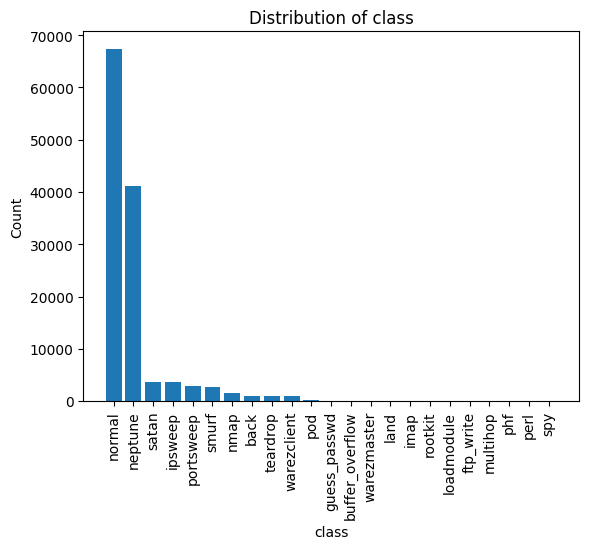

In [37]:
#3º Study of concepts
import pandas as pd
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

path="/content/drive/MyDrive/Colab_Notebooks/NSL_KDD/KDDTrain+.csv"
df = pd.read_csv(path)
#print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1)

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

    #Filter only the attacks
    col = "class"

    uniques = df[col].unique()
    unique_count = len(uniques)
    if unique_count > 100:
        print("** {}:{} ({}%)".format(col, unique_count, int((unique_count / total) * 100)))
    else:
        print("** {}:{}".format(col, expand_categories(df[col])))
        category_counts = df[col].value_counts()

        # Graph
        fig, ax = plt.subplots()
        ax.bar(category_counts.index, category_counts.values)

        # Adjust axis x
        plt.xticks(rotation=90)

        #Show and plot graph
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title('Distribution of {}'.format(col))
        plt.show()
analyze(df)



In [38]:
pip install tcav

In [39]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')
    print(os.getcwd())

/
/


In [40]:
from tensorflow.io import gfile
from tcav.utils import create_session

# 1º Make source directory para las siguientes operaciones
!rm -rf ./tcav/tcav_examples/discrete/nslkdd_sanity2/*
source_dir = "./tcav/tcav_examples/discrete/nslkdd_sanity2"
working_dir = source_dir

acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)

cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)

!ls ./tcav/tcav_examples/discrete/nslkdd_sanity2/

activations  cav


In [41]:
#2º MAKE CONCEPTS
import pandas as pd
import argparse
from tensorflow.io import gfile
import os

def make_concepts_targets_and_randoms(source_dir):

  path="/content/drive/MyDrive/Colab_Notebooks/NSL_KDD/KDDTrain+.csv"
  df = pd.read_csv(path)
  print("Read {} rows.".format(len(df)))
  df.dropna(inplace=True,axis=1)
  df=df.drop("nivel_dificultad", axis=1)

  #1º CONCEPT DEFINITION AND FOLDERS
  # Make concept folders with the csv files
  def make_concept_folder(df, concept):
    # Create the folder and save the dataframe as a csv file there
    path = os.path.join(source_dir, concept)
    if not gfile.exists(path):
      gfile.makedirs(path)

    concept_file_name = os.path.join(path, concept + ".csv")
    df.to_csv(concept_file_name, index=False)

  #ORIGINAL CONCEPTS
  """concept_less_df = df[df["dst_host_same_src_port_rate"] < 1]
  concept_more_df = df[df["dst_host_same_src_port_rate"] >= 1]
  make_concept_folder(concept_less_df, "dst_host_same_src_port_rate_less_than_one")
  make_concept_folder(concept_more_df, "dst_host_same_src_port_rate_more_than_one")
  """
  #PROTOCOL BASED CONCEPTS: TCP, UDP, ICMP
  tcp_df = df[df["protocol_type"] == "tcp"]
  udp_df = df[df["protocol_type"] == "udp"]
  icmp_df = df[df["protocol_type"] == "icmp"]
  make_concept_folder(tcp_df, "protocol_tcp")
  make_concept_folder(udp_df, "protocol_udp")
  make_concept_folder(icmp_df, "protocol_icmp")
  #SERVICE TYPES CONCEPTS
  private_df = df[df["service"] == "private"]
  http_df = df[df["service"] == "http"]
  make_concept_folder(private_df, "service_private")
  make_concept_folder(http_df, "service_http")
  #FLAG VALUES CONCEPTS: SF, S0, REJ
  SF_df = df[df["flag"] == "SF"]
  S0_df = df[df["flag"] == "S0"]
  REJ_df = df[df["flag"] == "REJ"]
  make_concept_folder(tcp_df, "flag_SF")
  make_concept_folder(udp_df, "flag_S0")
  make_concept_folder(icmp_df, "flag_REJ")
  #LOGGED_IN
  logged_in_df = df[df["logged_in"] == 1]
  logged_out_df = df[df["logged_in"] == 0]
  make_concept_folder(logged_in_df, "logged_in")
  make_concept_folder(logged_out_df, "logged_out")
  # SRC_BYTES CONCEPTS
  high_src_bytes_df = df[df["src_bytes"] > 0.001]
  low_src_bytes_df = df[df["src_bytes"] < 0.001]
  make_concept_folder(high_src_bytes_df, "src_bytes_high")
  make_concept_folder(low_src_bytes_df, "src_bytes_low")
  # DST_BYTES CONCEPTS
  high_dst_bytes_df = df[df["dst_bytes"] > 0.001]  # Reemplaza <high_threshold> por el umbral que consideres como un valor alto
  low_dst_bytes_df = df[df["dst_bytes"] < 0.001]  # Reemplaza <low_threshold> por el umbral que consideres como un valor bajo
  make_concept_folder(high_dst_bytes_df, "dst_bytes_high")
  make_concept_folder(low_dst_bytes_df, "dst_bytes_low")
  #CONCEPTS
  concepts_protocol=["protocol_tcp", "protocol_udp", "protocol_icmp"]
  concepts_service=["service_private", "service_http"]
  concepts_flag=["flag_SF", "flag_S0", "flag_REJ"]
  concepts_logged=["logged_in", "logged_out"]
  concepts_src=["src_bytes_high", "src_bytes_low"]
  concepts_dst=["dst_bytes_high", "dst_bytes_low"]
  print("Available concepts for NSLKDD dataset are: ")
  #print(["dst_host_same_src_port_rate_less_than_one", "dst_host_same_src_port_rate_more_than_one"])
  print(concepts_protocol)
  print(concepts_service)
  print(concepts_flag)
  print(concepts_logged)
  print(concepts_src)
  print(concepts_dst)
  print("\n")

  #2º MAKE RANDOM EXAMPLES
  # Making random_examples
  random_size = 10
  random_partitions = 11
  for i in range(random_partitions):
    random_partition_name = "random500_" + str(i)
    randoms = df.sample(random_size)
    make_concept_folder(randoms, random_partition_name)

  #3º MAKE LABELS.TXT WITH ALL ATTACK TYPES
  # Make target folder
  targets = df["class"].unique()
  print("Available targets for NSLKDD dataset are: ")
  print(targets)
  print("\n")
  print("Created 10 random folders \n")
  for target in targets:
    target_df = df[df["class"] == target]
    make_concept_folder(target_df, target)
  # make labels
  with open(os.path.join(source_dir, "labels.txt"), "w") as the_file:
    for target in targets:
      the_file.write(target + "\n")

#4º IMPLEMENT FUNCTION
if not gfile.exists(source_dir):
  gfile.makedirs(os.path.join(source_dir))
  print("Created source directory at " + source_dir)
# Make data
!rm -rf ./tcav/tcav_examples/discrete/nslkdd_sanity2/*
make_concepts_targets_and_randoms(source_dir)
print("Successfully created data at " + source_dir)
print("final")
!ls ./tcav/tcav_examples/discrete/nslkdd_sanity2


Read 125972 rows.
Available concepts for NSLKDD dataset are: 
['protocol_tcp', 'protocol_udp', 'protocol_icmp']
['service_private', 'service_http']
['flag_SF', 'flag_S0', 'flag_REJ']
['logged_in', 'logged_out']
['src_bytes_high', 'src_bytes_low']
['dst_bytes_high', 'dst_bytes_low']


Available targets for NSLKDD dataset are: 
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


Created 10 random folders 

Successfully created data at ./tcav/tcav_examples/discrete/nslkdd_sanity2
final
back		 ipsweep     perl	    random500_2  service_http
buffer_overflow  labels.txt  phf	    random500_3  service_private
dst_bytes_high	 land	     pod	    random500_4  smurf
dst_bytes_low	 loadmodule  portsweep	    random500_5  spy
flag_REJ	 logged_in   protocol_icmp  random500_6  src_bytes_high
flag_S0		 logged_out  protocol_tc

In [42]:
#3 CREATE MODEL

from __future__ import division
from __future__ import print_function

import os
import tensorflow as tf
import argparse
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import OrdinalEncoder

# Types of the columns in the dataset
kFloatIndices = [24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40]
kIntIndices = [
    0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
    31, 32
]
kBytesIndices = [1, 2, 3]

#1º PRE-PROCESS DATASET
def encode_variables(data):
  #Encodes categorical variables with Ordinal Encoding
  data2 = np.copy(data)#independent copy
  encoder = OrdinalEncoder()
  categorical_indices = kBytesIndices
  data2[:,
        categorical_indices] = encoder.fit_transform(data2[:,
                                                           categorical_indices])
  return data2

def encoding_function(x, label_path):
  #Matches a label's name with the index from the labels.txt file
  # Open label file and get indices
  with tf.io.gfile.GFile(label_path, 'r') as f:
    labels = [l.strip().split(' ')[0] for l in f.readlines()]
  return labels.index(x)


def encode_labels(labels, label_path):
  #Encoding labels according to order in the labels file, so it is compliant with ModelWrapper
  labels2 = np.copy(labels)
  encoded = [encoding_function(x, label_path) for x in labels2]
  return encoded

def create_categorical_map(data):
  categorical_indices = kBytesIndices
  # Takes form {index : number of unique values}
  categorical_map = {}
  for index in categorical_indices:
    categorical_map[index] = np.unique(data[:, [index]]).shape[0]
  return categorical_map


def prepare_dataset(labels_path):
  path="/content/drive/MyDrive/Colab_Notebooks/NSL_KDD/KDDTrain+.csv"
  df = pd.read_csv(path)
  print("Read {} rows.".format(len(df)))
  df.dropna(inplace=True,axis=1)
  df=df.drop("nivel_dificultad", axis=1)
  df_dataset=df
  if 'class' in df_dataset.columns:
    df_labels=df_dataset["class"]
    df_dataset=df_dataset.drop("class", axis=1)

  data = np.array(df_dataset)
  labels = np.array(df_labels)
  encoded_data = encode_variables(data)
  encoded_labels = encode_labels(labels, labels_path)
  return encoded_data, encoded_labels


#2º CREATE MODEL
#Simple feedforward model with embedding representation for categorical variables
def make_keras_model(categorical_map):
  n_features = 41
  n_labels = 23
  # Make all placeholders
  inputs = []
  models = []

  input_layer = tf.keras.layers.Input(shape=(n_features,), name='input')
  inputs.append(input_layer)
  # Splits the input vector into multiple variables
  deconcat = tf.split(input_layer, [1 for i in range(n_features)], 1)
  for index in range(n_features):
    # For categorical variables, we create embedding layers
    if index in categorical_map.keys():
      vocab_size = categorical_map[index]
      inpt = deconcat[index]
      inputs.append(inpt)
      embed = tf.keras.layers.Embedding(vocab_size, 200, \
                                        trainable=True,
                                        embeddings_initializer=tf.compat.v1.initializers.random_normal())(inpt)

      embed_reshaped = tf.keras.layers.Reshape(target_shape=(200,))(embed)
      models.append(embed_reshaped)
    else:
      # Else, create a simple input for numerical features
      inpt = deconcat[index]
      inputs.append(inpt)
      models.append(inpt)
  # Concatenate them into a single vector
  merge_models = tf.keras.layers.concatenate(models)
  # Plug them into the DNN
  net = tf.keras.layers.Dense(1000, activation='relu')(merge_models)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dense(256, activation='relu')(net)
  net = tf.keras.layers.BatchNormalization()(net)

  pred = tf.keras.layers.Dense(n_labels, activation='sigmoid')(net)
  model_full = tf.keras.models.Model(inputs=input_layer, \
                                     outputs=pred)
  model_full.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), \
                     metrics=['accuracy'],
                     optimizer='adam')
  return model_full

#3º TRAIN AND SAVE MODEL
def train_and_save_model(model_path, labels_path):
  # Prepare dataset and split it
  data, labels = prepare_dataset(labels_path)
  train_data, test_data, train_labels, test_labels = train_test_split(
      data, labels, test_size=0.2)

  train_data = np.array(train_data)
  test_data = np.array(test_data)
  train_labels = np.array(train_labels)
  test_labels = np.array(test_labels)

  # Create categorical map for the embedding layer
  categorical_map = create_categorical_map(data)
  model = make_keras_model(categorical_map)

  print(model.summary())
  model.fit(
      train_data,
      train_labels,
      validation_data=(test_data, test_labels),
      epochs=4,
      batch_size=64)
  model.save(model_path)

  # Test on a small subset of predictions
  predictions = model.predict(test_data[:10])
  print(predictions)


In [43]:
#4 MODEL WRAPPER
from tcav.model import KerasModelWrapper
import tensorflow as tf


class NSLKDDKerasModelWrapper(KerasModelWrapper):
  def __init__(self, sess, model_path, labels_path):
    if not tf.io.gfile.exists(labels_path):
      raise Exception(
          "Labels path does not exist. Please provide a labels file.")
    # Train a model if we have none
    if not tf.io.gfile.exists(model_path):
      train_and_save_model(model_path, labels_path)

    # Initialize the wrapper
    super(NSLKDDKerasModelWrapper, self).__init__(sess, model_path, labels_path)

    # Using SparseCategoricalCrossEntropy here
    self.y_input = tf.compat.v1.placeholder(tf.int64, shape=[None])
    self.loss = self.model.loss_functions[0](self.y_input,
                                             self.model.outputs[0])
    self._make_gradient_tensors()

In [44]:
# Call functions to create, train and save model
if os.path.exists("./tcav/tcav_examples/discrete/nslkdd_sanity2/nslkdd_2.h5"):
  os.remove("./tcav/tcav_examples/discrete/nslkdd_sanity2/nslkdd_2.h5")
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "nslkdd_2.h5")

uci_model = NSLKDDKerasModelWrapper(create_session(), model_path, label_path)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Read 125972 rows.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 41)]         0           []                               
                                                                                                  
 tf_op_layer_split (TensorFlowO  [(None, 1),         0           ['input[0][0]']                  
 pLayer)                         (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                 

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


                                                                                                  
 reshape_1 (Reshape)            (None, 200)          0           ['embedding_1[0][0]']            
                                                                                                  
 reshape_2 (Reshape)            (None, 200)          0           ['embedding_2[0][0]']            
                                                                                                  
 concatenate (Concatenate)      (None, 638)          0           ['tf_op_layer_split[0][0]',      
                                                                  'reshape[0][0]',                
                                                                  'reshape_1[0][0]',              
                                                                  'reshape_2[0][0]',              
                                                                  'tf_op_layer_split[0][4]',      
          

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


100777/100777 [==============================] - 47s 465us/sample - loss: 0.1369 - accuracy: 0.9606 - val_loss: 0.6829 - val_accuracy: 0.8661
Epoch 2/4
100777/100777 [==============================] - 37s 369us/sample - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.8072 - val_accuracy: 0.7609
Epoch 3/4
100777/100777 [==============================] - 37s 371us/sample - loss: 0.0653 - accuracy: 0.9791 - val_loss: 0.5944 - val_accuracy: 0.9005
Epoch 4/4
100777/100777 [==============================] - 38s 381us/sample - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.6118 - val_accuracy: 0.8203


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[9.78213191e-01 1.18379742e-01 5.51367640e-01 9.99788344e-01
  5.17579675e-01 2.35566497e-02 9.34858799e-01 5.22124887e-01
  2.81035602e-02 6.69031739e-02 3.96418631e-01 1.68844461e-02
  4.30004597e-02 4.70971465e-01 6.61697090e-02 6.94352686e-02
  6.72768652e-02 4.28828597e-02 1.98002189e-01 4.29664552e-02
  1.49097562e-01 2.43987113e-01 1.05395049e-01]
 [9.98331606e-01 9.88373041e-01 5.58519363e-01 6.30050778e-01
  7.31168568e-01 1.53557062e-01 2.76724845e-01 5.85063219e-01
  9.02751684e-02 1.55243903e-01 8.35558295e-01 4.25133109e-03
  1.56980067e-01 1.84315860e-01 2.16146439e-01 5.58985710e-01
  1.29597157e-01 1.34613514e-02 5.64090610e-01 1.84218675e-01
  4.61219341e-01 2.26890206e-01 4.67258662e-01]
 [9.99733806e-01 5.70676625e-01 8.41626763e-01 6.19779110e-01
  6.68071926e-01 8.00672472e-02 4.49511796e-01 5.94501138e-01
  4.83946204e-02 4.62757945e-02 8.03467512e-01 1.44070387e-03
  9.90791917e-02 1.11292452e-01 2.59105772e-01 3.86368215e-01
  7.35089481e-02 1.08626187e-02 4.10

In [45]:
#5 ACTIVATION VECTORS
import os
from tcav.activation_generator import DiscreteActivationGeneratorBase
import numpy as np
import tensorflow as tf


class NSLKDDDiscreteActivationGenerator(DiscreteActivationGeneratorBase):
  def __init__(self, model, source_dir, acts_dir, max_examples):
    self.source_dir = source_dir
    super(NSLKDDDiscreteActivationGenerator,
          self).__init__(model, source_dir, acts_dir, max_examples)

  def load_data(self, concept):

    concept_folder = os.path.join(self.source_dir, concept)
    concept_file = os.path.join(concept_folder, concept + '.csv')
    with tf.io.gfile.GFile(concept_file, 'r') as f:
      texts = [
          l.strip().split(',') for l in f.readlines()[:self.max_examples + 1]
      ]
    texts = np.array(texts, dtype='O')
    texts = texts[1:]  # remove headers
    texts = texts[:, :-1]  # remove labels
    #texts = self._convert_types(texts)  # Assign proper data types
    return texts

  def transform_data(self, data):

    encoded_data = encode_variables(data)
    return encoded_data

  def _convert_types(self, texts):
    texts[:, kBytesIndices] = texts[:, kBytesIndices].astype(str)
    texts[:, kFloatIndices] = texts[:, kFloatIndices].astype(np.float32)
    texts[:, kIntIndices] = texts[:, kIntIndices].astype(np.int)
    return texts

In [46]:
#Call the activation vectors class
!rm -rf ./tcav/tcav_examples/discrete/nslkdd_sanity2/activations/*
!rm -rf ./tcav/tcav_examples/discrete/nslkdd_sanity2/cav/*
act_gen = NSLKDDDiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

Class = neptune
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.84 (+- 0.26), random was 0.51 (+- 0.44). p-val = 0.024 (significant)
    Bottleneck = dense_1. TCAV Score = 0.83 (+- 0.24), random was 0.49 (+- 0.46). p-val = 0.026 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.25), random was 0.51 (+- 0.44). p-val = 0.005 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.01), random was 0.49 (+- 0.46). p-val = 0.002 (significant)
  Concept = protocol_icmp
    Bottleneck = dense. TCAV Score = 0.15 (+- 0.29), random was 0.51 (+- 0.44). p-val = 0.013 (significant)
    Bottleneck = dense_1. TCAV Score = 0.29 (+- 0.43), random was 0.49 (+- 0.46). p-val = 0.203 (not significant)
{'dense': {'bn_vals': [0.842, 0.0995, 0.14650000000000002], 'bn_stds': [0.263895812774663, 0.2521254647987783, 0.28522841723783415], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.8255000000000001, 0.013000000000000001, 0.01], 'bn_stds

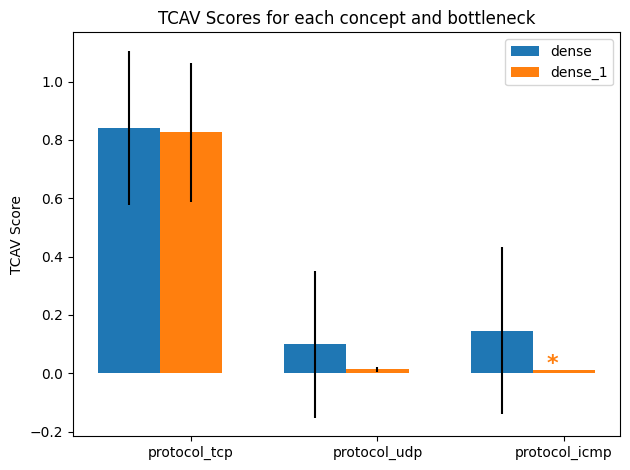

Class = normal
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.17 (+- 0.34), random was 0.54 (+- 0.43). p-val = 0.011 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.48). p-val = 0.002 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.84 (+- 0.32), random was 0.54 (+- 0.43). p-val = 0.041 (significant)
    Bottleneck = dense_1. TCAV Score = 0.97 (+- 0.05), random was 0.48 (+- 0.48). p-val = 0.002 (significant)
  Concept = protocol_icmp
    Bottleneck = dense. TCAV Score = 0.23 (+- 0.28), random was 0.54 (+- 0.43). p-val = 0.030 (significant)
    Bottleneck = dense_1. TCAV Score = 0.45 (+- 0.46), random was 0.48 (+- 0.48). p-val = 0.847 (not significant)
{'dense': {'bn_vals': [0.1695, 0.8385, 0.22999999999999998], 'bn_stds': [0.33981208042092914, 0.3216446020066247, 0.2817977998494665], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.001, 0.9705000000000001, 0.01], 'bn_stds': [0.003, 0.0

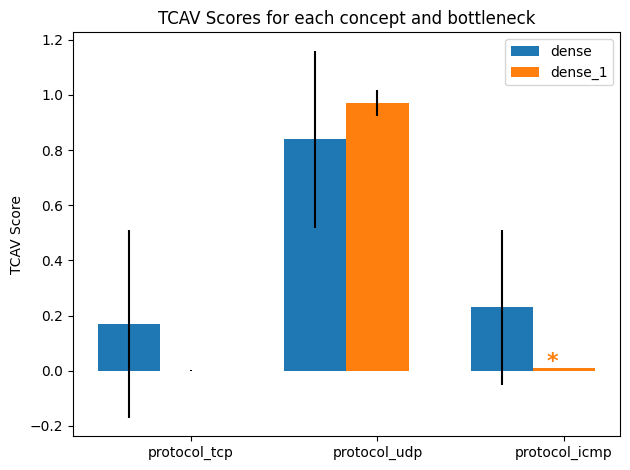

In [47]:
#6 TCAV EXPLAINABILITY
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "neptune"
target2 = "normal"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1"]
#Evaluate the importance of the following concepts
concepts_protocol=["protocol_tcp", "protocol_udp", "protocol_icmp"]
concepts = concepts_protocol
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)


Class = neptune
  Concept = service_private
    Bottleneck = dense. TCAV Score = 0.82 (+- 0.30), random was 0.51 (+- 0.44). p-val = 0.034 (significant)
    Bottleneck = dense_1. TCAV Score = 0.94 (+- 0.04), random was 0.49 (+- 0.46). p-val = 0.003 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.14 (+- 0.28), random was 0.51 (+- 0.44). p-val = 0.011 (significant)
    Bottleneck = dense_1. TCAV Score = 0.39 (+- 0.46), random was 0.49 (+- 0.46). p-val = 0.540 (not significant)
{'dense': {'bn_vals': [0.8240000000000001, 0.135], 'bn_stds': [0.29912204866910097, 0.2814693589007514], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.9359999999999999, 0.01], 'bn_stds': [0.04299999999999999, 0], 'significant': [True, False]}}


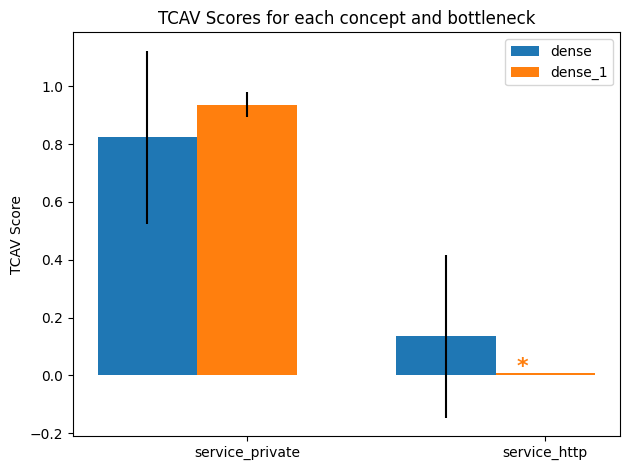

Class = normal
  Concept = service_private
    Bottleneck = dense. TCAV Score = 0.08 (+- 0.14), random was 0.54 (+- 0.43). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.48). p-val = 0.002 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.97 (+- 0.05), random was 0.54 (+- 0.43). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.34 (+- 0.42), random was 0.48 (+- 0.48). p-val = 0.369 (not significant)
{'dense': {'bn_vals': [0.08349999999999999, 0.9684999999999999], 'bn_stds': [0.13978644426409878, 0.05486574523325096], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.0, 0.01], 'bn_stds': [0.0, 0], 'significant': [True, False]}}


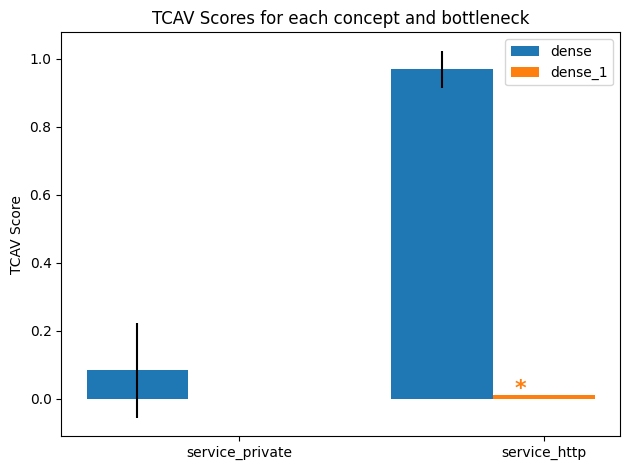

In [48]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "neptune"
target2 = "normal"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1"]
#Evaluate the importance of the following concepts
concepts_service=["service_private", "service_http"]
concepts = concepts_service
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)

Class = neptune
  Concept = flag_SF
    Bottleneck = dense. TCAV Score = 0.93 (+- 0.09), random was 0.51 (+- 0.44). p-val = 0.004 (significant)
    Bottleneck = dense_1. TCAV Score = 0.92 (+- 0.06), random was 0.49 (+- 0.46). p-val = 0.004 (significant)
  Concept = flag_S0
    Bottleneck = dense. TCAV Score = 0.14 (+- 0.20), random was 0.51 (+- 0.44). p-val = 0.011 (significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.37), random was 0.49 (+- 0.46). p-val = 0.058 (not significant)
  Concept = flag_REJ
    Bottleneck = dense. TCAV Score = 0.13 (+- 0.17), random was 0.51 (+- 0.44). p-val = 0.009 (significant)
    Bottleneck = dense_1. TCAV Score = 0.30 (+- 0.45), random was 0.49 (+- 0.46). p-val = 0.236 (not significant)
{'dense': {'bn_vals': [0.925, 0.1395, 0.131], 'bn_stds': [0.08538149682454625, 0.19971792608576727, 0.16647522338173928], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.9194999999999999, 0.01, 0.01], 'bn_stds': [0.0599353818708115, 0, 0], 'signif

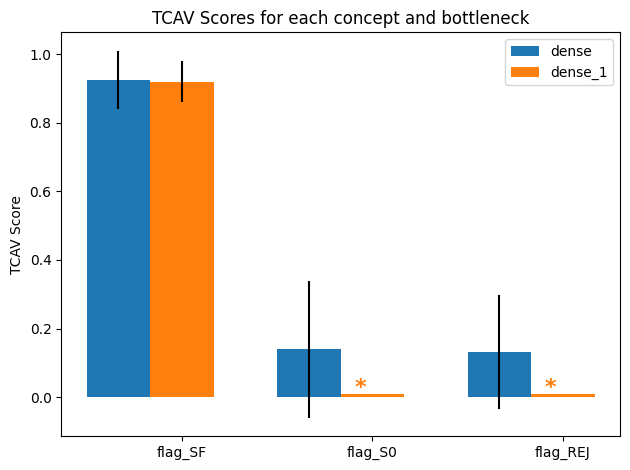

Class = normal
  Concept = flag_SF
    Bottleneck = dense. TCAV Score = 0.20 (+- 0.33), random was 0.54 (+- 0.43). p-val = 0.019 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.01), random was 0.48 (+- 0.48). p-val = 0.002 (significant)
  Concept = flag_S0
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.02), random was 0.54 (+- 0.43). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.61 (+- 0.48), random was 0.48 (+- 0.48). p-val = 0.451 (not significant)
  Concept = flag_REJ
    Bottleneck = dense. TCAV Score = 0.21 (+- 0.21), random was 0.54 (+- 0.43). p-val = 0.020 (significant)
    Bottleneck = dense_1. TCAV Score = 0.69 (+- 0.45), random was 0.48 (+- 0.48). p-val = 0.205 (not significant)
{'dense': {'bn_vals': [0.20049999999999998, 0.9914999999999999, 0.209], 'bn_stds': [0.33039710955152135, 0.015173990905493533, 0.2087199080107118], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.002, 0.01, 0.01], 'bn_stds': [0.006, 0, 0], 'signifi

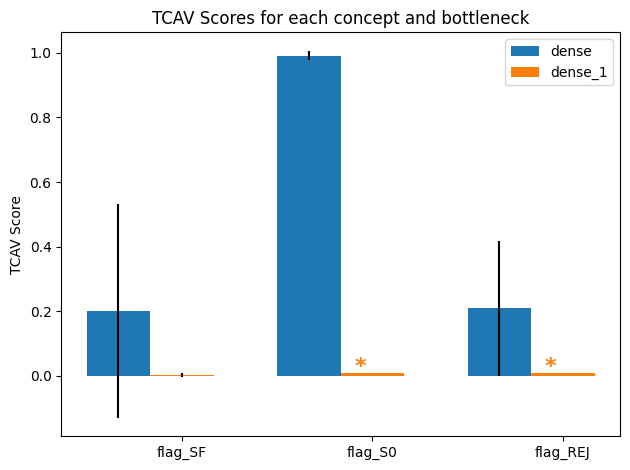

In [49]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "neptune"
target2 = "normal"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1"]
#Evaluate the importance of the following concepts
concepts_flag=["flag_SF", "flag_S0", "flag_REJ"]
concepts = concepts_flag
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)



Class = neptune
  Concept = logged_in
    Bottleneck = dense. TCAV Score = 0.15 (+- 0.25), random was 0.51 (+- 0.44). p-val = 0.013 (significant)
    Bottleneck = dense_1. TCAV Score = 0.45 (+- 0.45), random was 0.49 (+- 0.46). p-val = 0.836 (not significant)
  Concept = logged_out
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.12), random was 0.51 (+- 0.44). p-val = 0.007 (significant)
    Bottleneck = dense_1. TCAV Score = 0.93 (+- 0.06), random was 0.49 (+- 0.46). p-val = 0.004 (significant)
{'dense': {'bn_vals': [0.14750000000000002, 0.9019999999999999], 'bn_stds': [0.25302420832797795, 0.1202331069215131], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.01, 0.9265000000000001], 'bn_stds': [0, 0.06496345126299864], 'significant': [False, True]}}


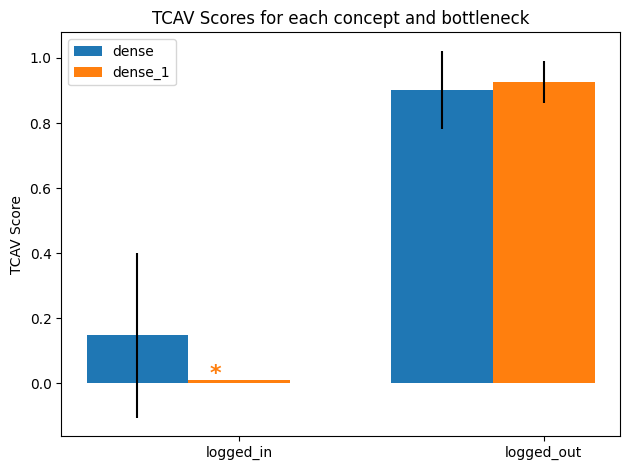

Class = normal
  Concept = logged_in
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.13), random was 0.54 (+- 0.43). p-val = 0.011 (significant)
    Bottleneck = dense_1. TCAV Score = 0.31 (+- 0.45), random was 0.48 (+- 0.48). p-val = 0.290 (not significant)
  Concept = logged_out
    Bottleneck = dense. TCAV Score = 0.09 (+- 0.27), random was 0.54 (+- 0.43). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.48). p-val = 0.002 (significant)
{'dense': {'bn_vals': [0.9034999999999999, 0.0895], 'bn_stds': [0.12924879109686094, 0.26518342708397147], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.01, 0.0], 'bn_stds': [0, 0.0], 'significant': [False, True]}}


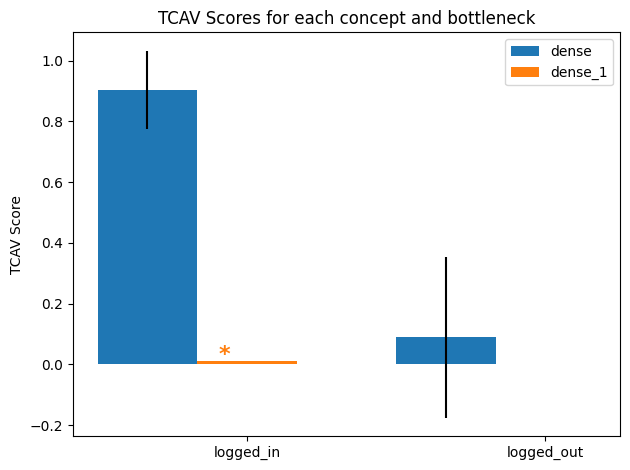

In [50]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)


#Target traffic type
target1 = "neptune"
target2 = "normal"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1"]
#Evaluate the importance of the following concepts
concepts_logged=["logged_in", "logged_out"]
concepts = concepts_logged
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)


Class = neptune
  Concept = src_bytes_high
    Bottleneck = dense. TCAV Score = 0.19 (+- 0.36), random was 0.51 (+- 0.44). p-val = 0.032 (significant)
    Bottleneck = dense_1. TCAV Score = 0.11 (+- 0.29), random was 0.49 (+- 0.46). p-val = 0.013 (significant)
  Concept = src_bytes_low
    Bottleneck = dense. TCAV Score = 0.96 (+- 0.02), random was 0.51 (+- 0.44). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.05), random was 0.49 (+- 0.46). p-val = 0.002 (significant)
{'dense': {'bn_vals': [0.191, 0.9574999999999999], 'bn_stds': [0.3647793853824528, 0.02015564437074637], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.10700000000000001, 0.9470000000000001], 'bn_stds': [0.29436541916468384, 0.0548270006474912], 'significant': [True, True]}}


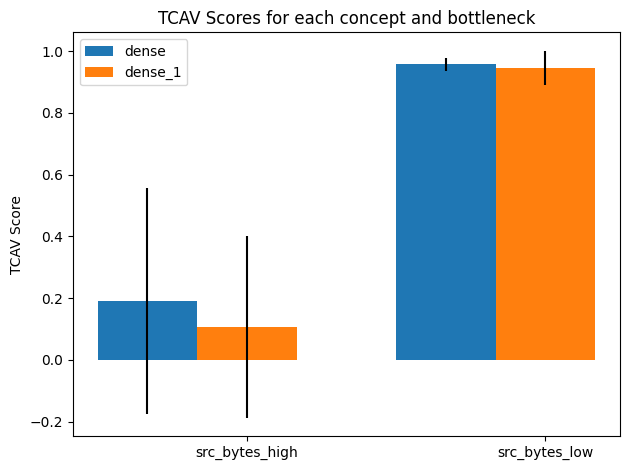

Class = normal
  Concept = src_bytes_high
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.02), random was 0.54 (+- 0.43). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.62 (+- 0.47), random was 0.48 (+- 0.48). p-val = 0.407 (not significant)
  Concept = src_bytes_low
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.54 (+- 0.43). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.48). p-val = 0.002 (significant)
{'dense': {'bn_vals': [0.9945, 0.0], 'bn_stds': [0.016500000000000015, 0.0], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.01, 0.0], 'bn_stds': [0, 0.0], 'significant': [False, True]}}


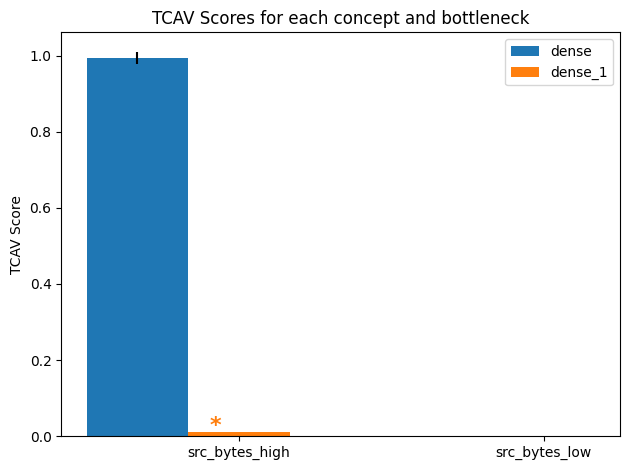

In [51]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)


#Target traffic type
target1 = "neptune"
target2 = "normal"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1"]
#Evaluate the importance of the following concepts
concepts_src=["src_bytes_high", "src_bytes_low"]
concepts = concepts_src
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)

Class = neptune
  Concept = dst_bytes_high
    Bottleneck = dense. TCAV Score = 0.04 (+- 0.09), random was 0.51 (+- 0.44). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.48 (+- 0.48), random was 0.49 (+- 0.46). p-val = 0.976 (not significant)
  Concept = dst_bytes_low
    Bottleneck = dense. TCAV Score = 0.94 (+- 0.06), random was 0.51 (+- 0.44). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.05), random was 0.49 (+- 0.46). p-val = 0.006 (significant)
{'dense': {'bn_vals': [0.038, 0.9440000000000002], 'bn_stds': [0.09236341266973629, 0.057175169435691224], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.01, 0.9019999999999999], 'bn_stds': [0, 0.05244997616777342], 'significant': [False, True]}}


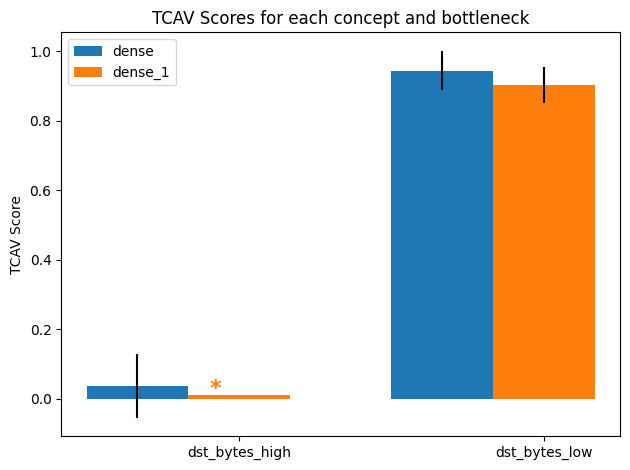

Class = normal
  Concept = dst_bytes_high
    Bottleneck = dense. TCAV Score = 0.97 (+- 0.05), random was 0.54 (+- 0.43). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.30 (+- 0.46), random was 0.48 (+- 0.48). p-val = 0.266 (not significant)
  Concept = dst_bytes_low
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.01), random was 0.54 (+- 0.43). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.48 (+- 0.48). p-val = 0.016 (significant)
{'dense': {'bn_vals': [0.968, 0.0025], 'bn_stds': [0.04659399102888698, 0.006020797289396148], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.01, 0.1], 'bn_stds': [0, 0.30000000000000004], 'significant': [False, True]}}


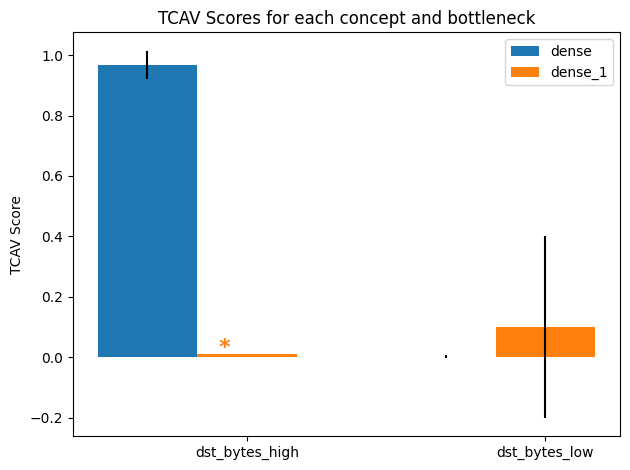

In [52]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)



#Target traffic type
target1 = "neptune"
target2 = "normal"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1"]
#Evaluate the importance of the following concepts
concepts_dst=["dst_bytes_high", "dst_bytes_low"]
concepts = concepts_dst
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)